In [19]:
import pandas as pd
import matplotlib as plt

In [80]:
df = pd.read_csv('data.csv')
pd.set_option("display.max.columns", None)
df.head()

,Rango,CodigoEspecialidad,Especialidad,Total,Hombres,Mujeres,CategoriaEspecialidad,ParticipacionMujeres,TamanioMuestra,Empleado,TiempoCompleto,TiempoParcial,TiempoCompletoAnio,Desempleado,TasaDesempleo,Mediana,P25,P75,TrabajosUniversitarios,TrabajosNoUniversitarios,TrabajosSalariosBajos
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


El dataset contiene algunas columnas relacionadas con los ingresos de los graduados en cada especialidad:

* "Mediana" es la mediana de los ingresos de los trabajadores a tiempo completo durante todo el año.
* "P25" es el percentil 25 de los ingresos.
* "P75" es el percentil 75 de ingresos.
* "Rango" es el rango del mayor por ganancias medianas.

In [25]:
%matplotlib inline

### Existen diferentes graficos que se pueden usar


* **area**        es para parcelas de área.
* **bar**         es para gráficos de barras verticales.
* **barh**        es para gráficos de barras horizontales.
* **box**         es para diagramas de caja.
* **hexbin**      es para diagramas de hexbin.
* **hist**        es para histogramas.
* **kde**         es para gráficos de estimación de densidad del kernel.
* **density**     es un alias para "kde".
* **line**        es para gráficos de líneas.
* **pie**         es para gráficos circulares.
* **scatter**     es para diagramas de dispersión.


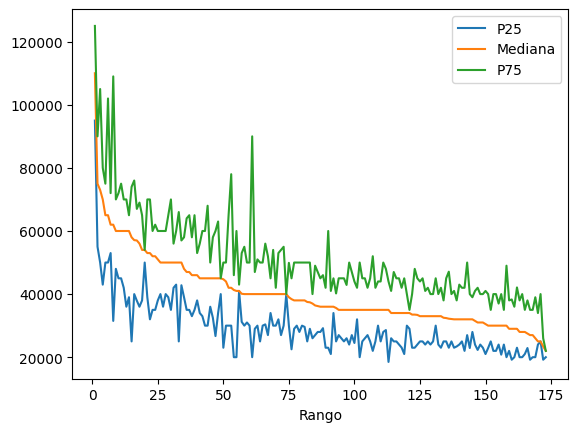

In [28]:
df.plot(x="Rango", y=["P25", "Mediana", "P75"])
plt.show()

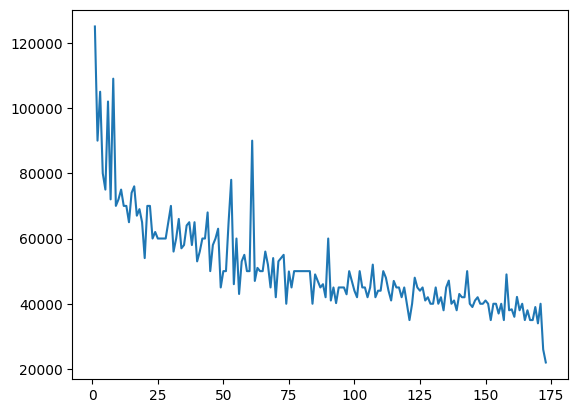

In [32]:
plt.plot(df["Rango"], df["P75"])

<Axes: xlabel='Rango'>

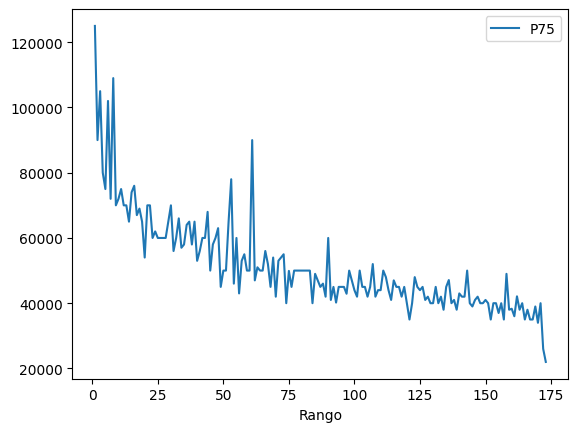

In [31]:
df.plot(x="Rango", y="P75")

## Distribuciones y Histograms

In [34]:
mediana = df["Mediana"]
type(mediana)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

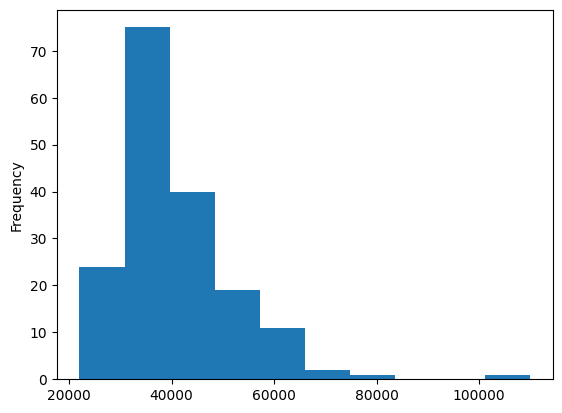

In [42]:
mediana.plot(kind="hist")

## Valores Atípicos

In [43]:
top_5 = df.sort_values(by="Mediana", ascending=False).head()

<Axes: xlabel='Especialidad'>

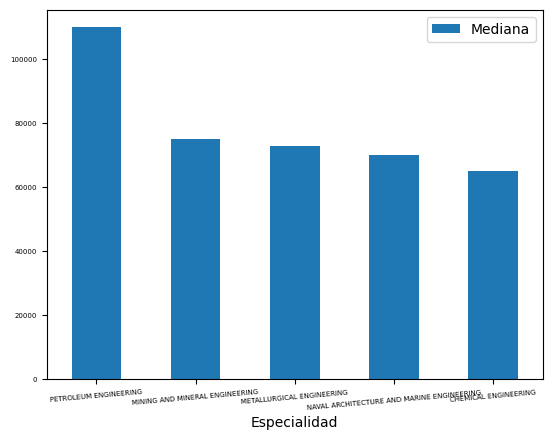

In [57]:
top_5.plot(x="Especialidad", y="Mediana", kind="bar", rot=5, fontsize=5)

#Esta gráfica muestra que el salario medio de los estudiantes de ingeniería petrolera es más de $20,000 más alto que el resto. Las ganancias de las carreras del segundo al cuarto lugar son relativamente similares entre sí.

<Axes: xlabel='Especialidad'>

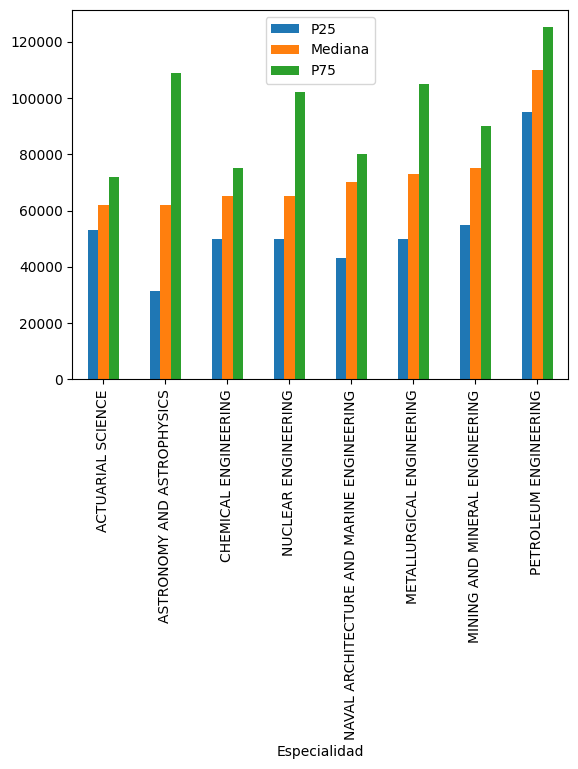

In [59]:
top_medianas = df[df["Mediana"] > 60000].sort_values("Mediana")
top_medianas.plot(x="Especialidad", y=["P25", "Mediana", "P75"], kind="bar")

# Los percentiles 25 y 75 confirman que las carreras de ingeniería petrolera fueron, con mucho, los recién graduados mejor pagados.

## Comprobar correlación

La correlación trata de establecer la relación o dependencia que existe entre las dos variables 

un cambio en uno resulte en un cambio en el otro

<Axes: xlabel='Mediana', ylabel='TasaDesempleo'>

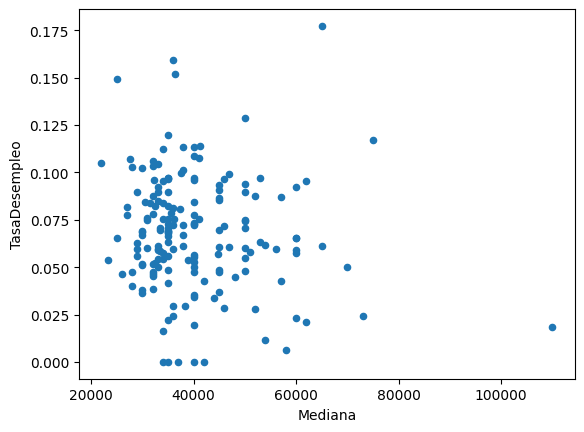

In [76]:
df.plot(x="Mediana", y="TasaDesempleo", kind="scatter")

* correlación despreciable: r < |0.1|
* correlación baja: |0.1| < r <= |0.3|
* correlación mediana : |0.3| < r <= |0.5|
* correlación fuerte o alta: r > |0.5|

In [79]:
df_corr = df[["Mediana", "TasaDesempleo"]]
df_corr.corr()


,Mediana,TasaDesempleo
Mediana,1.000000,-0.108833
TasaDesempleo,-0.108833,1.000000


# Analizar datos categóricos

In [83]:
cat_totales = df.groupby("CategoriaEspecialidad")["Total"].sum().sort_values()
cat_totales

CategoriaEspecialidad
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='CategoriaEspecialidad'>

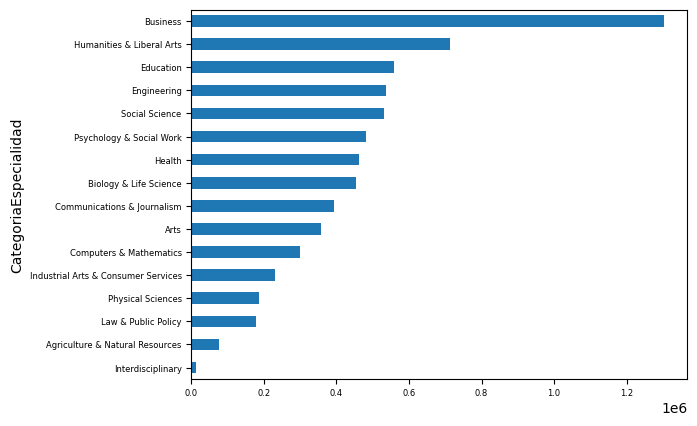

In [85]:
cat_totales.plot(kind="barh", fontsize=6)

## Determinar Ratios

<Axes: >

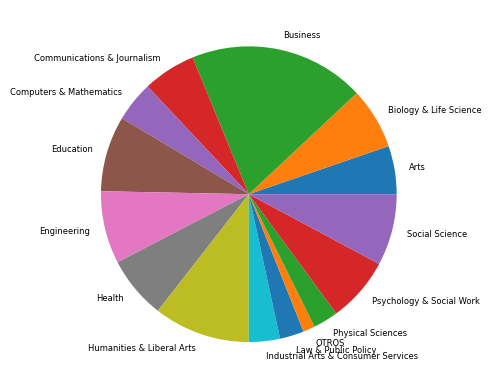

In [106]:
total_cat_pequenas = cat_totales[cat_totales < 100_000]
total_cat_grandes = cat_totales[cat_totales > 100_000]

suma_pequenas = pd.Series([total_cat_pequenas.sum()], index=["OTROS"])
total_cat_grandes = total_cat_grandes.add(suma_pequenas, fill_value=0)

total_cat_grandes.plot(kind="pie", label="", fontsize=6)